In [3]:
from work.models.decoder import RecurrentActivityClassificationNetwork

model = RecurrentActivityClassificationNetwork(1, 1, stateful=True)
model.load_weights('../models/training/lstm_activity_classification/lstm_activity_classification_01_e100.hdf5')
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Using Theano backend.


In [4]:
from work.dataset.activitynet import ActivityNetDataset

dataset = ActivityNetDataset(
    videos_path='../dataset/videos.json',
    labels_path='../dataset/labels.txt'
)

In [5]:
video = None
for v in dataset.videos:
    if v.video_id == 'hfk93bEIjwc':
        video = v
print(video.serialize())
video_path = '../downloads/dataset/validation/'+video.video_id+'.mp4'

{'subset': 'validation', 'num_frames': 2150, 'annotations': [{'segment': [13.819193447737911, 85.801], 'label': 'Rafting'}], 'resolution': '1920x1080', 'duration': 86.054, 'url': 'https://www.youtube.com/watch?v=hfk93bEIjwc'}


In [6]:
import numpy as np
features = np.load('../downloads/features/'+video.video_id+'.npy')
print(features[:,:].shape)
nb_instances = features.shape[0]

features = features.reshape(nb_instances, 1, 4096)
print(features.shape)
model.reset_states()
YY=model.predict_classes(features, batch_size=1)


(134, 4096)
(134, 1, 4096)
134/134 [==============================] - 1s     


In [7]:
video.get_video_instances(16, 0)
ground_trouth = np.array([instance.output for instance in video.instances])
print(ground_trouth)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69]


In [8]:
print(YY.shape)
YY=YY.reshape(nb_instances)
print(YY)
print(ground_trouth)


(134, 1)
[ 0  0  0  0  0  0 69 69 69 69 69 69  0  0  0  0  0  0  0  0  0  0  0  0  0
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69  0 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69  0 69 69 69 69 69 69 69 69 69 69  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 69 69  0  0  0 69 69 69 69 69
  0 69 69 69 69 69  0  0 69 69 69 69 69 69  0 69 69 69 69 69 69 69 69 69 69
 69  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69]


In [9]:
dataset.get_output_index(video.label)

69

In [10]:
print(video.subset)

validation


In [11]:
print(ground_trouth==YY)

[ True  True  True  True  True  True False False False False False False
  True  True  True  True  True  True  True  True  True  True False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True False False False  True
  True  True  True  True False  True  True  True  True  True False False
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False False]


In [12]:
counts = np.bincount(YY)
print(counts)

[58  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 76]


In [13]:
predicted_class = np.argmax(np.bincount(YY)[1:])+1

In [14]:
print(predicted_class)

69


In [15]:
k_3 = np.argsort(counts[1:])[::-1][:3] + 1
print(k_3)

(counts[k_3]/np.sum(counts[1:]))

[69 25 19]


array([ 1.,  0.,  0.])

In [16]:
from work.processing.output import get_top_k_predictions, get_top_k_predictions_score

top_3 = get_top_k_predictions(YY, 3)
print(top_3)
_, scores = get_top_k_predictions_score(YY, 3)
print(scores)
for index in top_3:
    print(scores, dataset.labels[index][1])

[69 25 19]
[ 1.  0.  0.]
[ 1.  0.  0.] Rafting
[ 1.  0.  0.] Cutting the grass
[ 1.  0.  0.] Carving jack-o-lanterns


In [17]:
print(ground_trouth)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69]


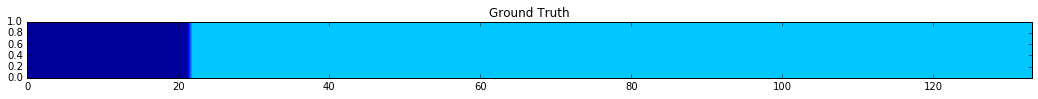

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

normalize = matplotlib.colors.Normalize(vmin=0, vmax=201)


plt.figure(num=None, figsize=(18, 1), dpi=100)
plt.contourf(np.broadcast_to(ground_trouth, (2, nb_instances)), norm=normalize)
plt.title('Ground Truth')
#plt.imshow(ground_trouth.reshape(1,nb_instances).astype(np.float32))
plt.show()

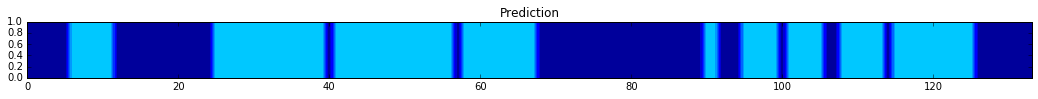

In [19]:
plt.figure(num=None, figsize=(18, 1), dpi=100)
plt.contourf(np.broadcast_to(YY, (2, nb_instances)), norm=normalize)
plt.title('Prediction')
#plt.imshow(ground_trouth.reshape(1,nb_instances).astype(np.float32))
plt.show()

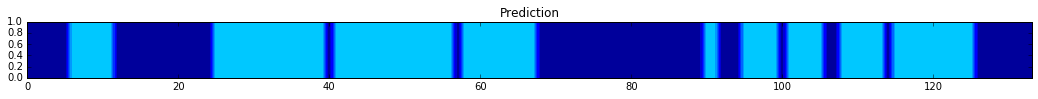

In [20]:
from work.processing.visualization import plot_sequence

plot_sequence(YY, title='Prediction')

In [74]:
print(video.label)

Rafting


In [19]:
print(video.url)

https://www.youtube.com/watch?v=Zn84iOuIkDs


In [20]:
score = np.sum(YY==ground_trouth)/len(YY)

In [21]:
print(score)

0.649635036496


In [56]:
import random

videos = dataset.get_subset_videos('validation')
v = random.choice(videos)
print(v.video_id)

hfk93bEIjwc


In [23]:
print(YY)

[  0   0   0   0   0   0   0 152 150 150 150   0   0   0 149 149  22  22
  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22
  22  22  22   0   0  22  22  22  22  22  22  22  22  22  22  22  22  22
  22  22  22  22  22  22  22   0   0  22  22  22  22  22  22  22  22  22
  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22
  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22
  22   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0]


In [24]:
np.save('YY', YY)

In [25]:
from work.dataset.activitynet import ActivityNetDataset

dataset = ActivityNetDataset(
    videos_path='../dataset/videos.json',
    labels_path='../dataset/labels.txt'
)
video = None
for v in dataset.videos:
    if v.video_id == 'Zn84iOuIkDs':
        video = v

import numpy as np
from work.processing.output import get_temporal_predictions

YY = np.load('YY.npy')
print(YY)

predictions = get_temporal_predictions(YY, fps=video.num_frames/video.duration, clip_length=16)

print(predictions)

[  0   0   0   0   0   0   0 152 150 150 150   0   0   0 149 149  22  22
  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22
  22  22  22   0   0  22  22  22  22  22  22  22  22  22  22  22  22  22
  22  22  22  22  22  22  22   0   0  22  22  22  22  22  22  22  22  22
  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22
  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22
  22   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0]
[{'segment': [9.49358614402917, 23.140616226071103], 'label': 22, 'score': 1}, {'segment': [24.32731449407475, 36.19429717411121], 'label': 22, 'score': 1}, {'segment': [37.38099544211486, 64.67505560619873], 'label': 22, 'score': 1}]


In [4]:
import numpy as np
instances = np.array([video.num_frames//16 for video in dataset.videos])

In [5]:
print(np.min(instances))
print(np.max(instances))

1
1826


In [6]:
np.argmin(instances)

2035

In [7]:
dataset.videos[_].serialize()

{'annotations': [{'label': 'Throwing darts',
   'segment': [0.19999999999999998, 2.865034013605442]}],
 'duration': 3.066,
 'num_frames': 29,
 'resolution': '320x240',
 'subset': 'validation',
 'url': 'https://www.youtube.com/watch?v=j73Wh1olDsA'}